# Data analysis

This notebook generates all the plots used in the paper. In order to use this notebook specify the *checkpoint_folder*, in which is located *fmnist.csv* and *CIFAR.csv*.

## Imports

In [ ]:
#libraries import
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple
from datetime import datetime
from itertools import product
import numpy as np
import scipy.stats
import pandas as pd
import os

from helpers import * 

sns.set_style("dark")

In [ ]:
# specify the folder in which are csv files located
results_folder = 'results/'
fmnist_df_path = f'{results_folder}fmnist.csv'
cifar_df_path = f'{results_folder}CIFAR10.csv'

# specify the folder in which plots are going to be saved. If None, plots are not going to be saved
plot_folder = ''
checkpoints = "checkpoints/"

## Creating and loading dataframes

### FashionMNIST

In [ ]:
if os.path.exists(fmnist_df_path):
  fmnist_df = pd.read_csv(fmnist_df_path, index_col=[0])
else:
  print("Data needs to be downloaded form GDrive to extract the results for plotting. Please refer to the README.md file.")
  fmnist_df = generate_dataframe_per_dataset("FashionMNIST", checkpoints)
  fmnist_df.to_csv(fmnist_df_path)
print('Done')

Done


In [ ]:
fmnist_df.head()

,Minimization,optim,Optimizer,training_accuracy,Validation accuracy,training_loss,val_loss,Generalization gap,epoch,Sharpness,Architecture
0,standard,Adam,Adam,99.513336,91.979996,0.014862,0.729570,7.533340,50.0,40364.594347,SimpleBatch
1,standard,SGD 0.1,SGD,100.000000,92.769997,0.000050,0.516581,7.230003,50.0,37819.346180,SimpleBatch
2,standard,AdaBound,AdaBound,100.000000,92.720001,0.000055,0.537387,7.279999,50.0,35747.061795,SimpleBatch
3,standard,AdaShift,AdaShift,99.781670,92.389999,0.005874,0.600980,7.391670,50.0,47427.310191,SimpleBatch
4,standard,Adagrad,Adagrad,100.000000,92.659996,0.000585,0.440312,7.340004,50.0,42589.065929,SimpleBatch


### CIFAR10

In [ ]:
if os.path.exists(cifar_df_path):
  cifar_df = pd.read_csv(cifar_df_path, index_col=[0])
else:
  print("Data needs to be downloaded form GDrive to extract the results for plotting. Please refer to the README.md file.")
  cifar_df = generate_dataframe_per_dataset('CIFAR10', checkpoints)
  cifar_df.to_csv(cifar_df_path)
print('Done')

Done


In [ ]:
cifar_df.head()


,Minimization,optim,Optimizer,training_accuracy,Validation accuracy,training_loss,val_loss,Generalization gap,epoch,Sharpness,Architecture
3,standard,AdaShift 0.001,AdaShift,99.459999,71.589996,0.019315,1.619780,27.870003,50.0,467108.858864,SimpleBatch
10,standard,AdaShift 0.01,AdaShift,99.593994,76.610001,0.012215,2.136920,22.983994,100.0,99015.547609,SimpleBatch
13,standard,Adam,Adam,99.691994,76.199997,0.010103,2.927628,23.491997,150.0,85274.343582,SimpleBatch
21,SAM,AdaShift 0.01,AdaShift,99.610001,78.209999,0.010428,1.436348,21.400002,150.0,27490.104654,SimpleBatch
27,SAM,Adam,Adam,99.627998,77.549995,0.010072,1.882256,22.078003,200.0,21864.985911,SimpleBatch
10,SAM,Adam,Adam,99.559998,84.089996,0.012892,1.125786,15.470001,100.0,15772.315452,MiddleBatch
29,standard,Adam,Adam,99.787994,83.779999,0.010034,2.593193,16.007996,200.0,125334.552863,MiddleBatch
34,SAM,Adam,Adam,99.711998,84.279999,0.010790,2.117534,15.431999,200.0,45614.067676,MiddleBatch
3,standard,AdaShift 0.01,AdaShift,99.631996,84.320000,0.010287,1.151364,15.311996,50.0,64448.557400,ComplexBatch
6,standard,Adam,Adam,99.591995,85.689995,0.014837,1.434866,13.902000,100.0,96346.232905,ComplexBatch


# Plotting


## Validation accuracies and sharpnesses


### FashionMNIST

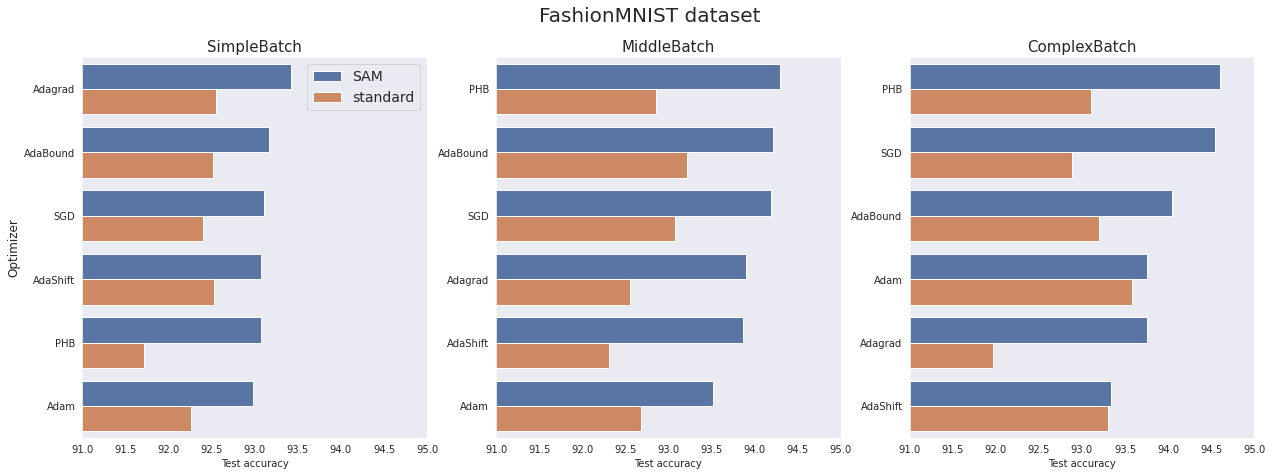

In [ ]:
########## Plot that is included in the paper
fig, ax = plt.subplots(1,3, figsize=(21, 7), sharex=True)
fig.suptitle(f'FashionMNIST dataset', fontsize=20)

for i,arc in enumerate(['SimpleBatch', 'MiddleBatch', 'ComplexBatch']):
    df = fmnist_df[(fmnist_df['Architecture']==arc)&(fmnist_df['epoch']=='converged')]
    orient = 'h'
    
    sns.barplot(data=df.sort_values('Validation accuracy', ascending=False), 
                y='Optimizer', hue='Minimization', x='Validation accuracy',
                ax=ax[i], 
                palette="deep", orient=orient)
    
    ax[i].set_title(arc, fontsize=15)
    if i != 0:
      ax[i].set(ylabel=None)
      ax[i].get_legend().remove()
    ax[i].set_xlabel('Test accuracy')

ax[0].set_ylabel('Optimizer', fontsize=12)
ax[0].set_xlim(91, 95)
ax[0].legend(fontsize=14)


if plot_folder != None:
    plt.savefig(f'{plot_folder}FMNIST_val_acc_same_scale.png', dpi=300)
plt.show()

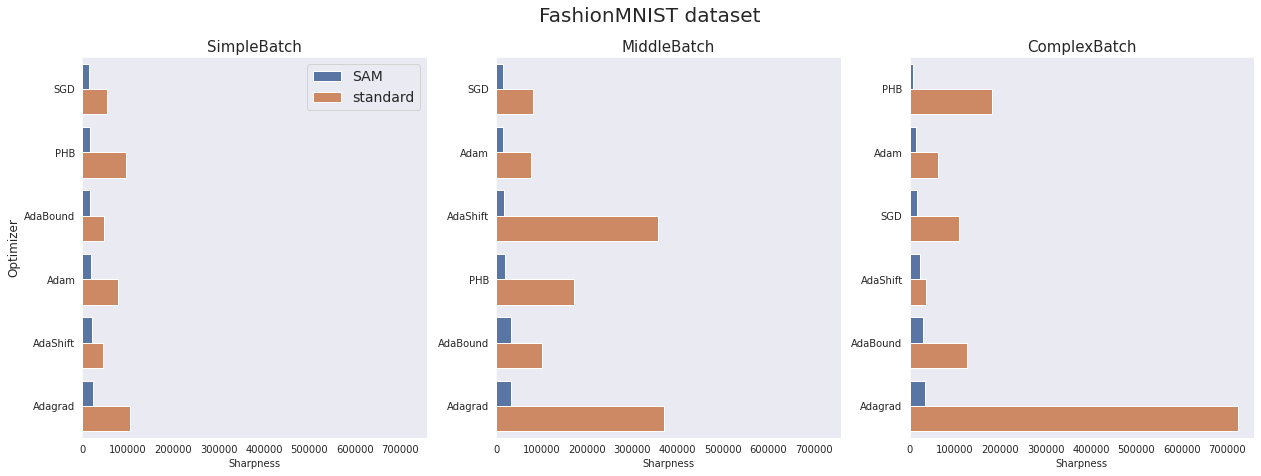

In [ ]:
########## Plot that is included in the paper
fig, ax = plt.subplots(1,3, figsize=(21, 7), sharex=True)
fig.suptitle(f'FashionMNIST dataset', fontsize=20)

for i,arc in enumerate(['SimpleBatch', 'MiddleBatch', 'ComplexBatch']):
    df = fmnist_df[(fmnist_df['Architecture']==arc)&(fmnist_df['epoch']=='converged')]
    orient = 'h'
    
    sns.barplot(data=df.sort_values('Sharpness'), 
                y='Optimizer', hue='Minimization', x='Sharpness',
                ax=ax[i], 
                palette="deep", orient=orient)
    
    ax[i].set_title(arc, fontsize=15)
    if i != 0:
      ax[i].set(ylabel=None)
      ax[i].get_legend().remove()

ax[0].legend(fontsize=14)
ax[0].set_ylabel('Optimizer', fontsize=12)


if plot_folder != None:
    plt.savefig(f'{plot_folder}FMNIST_sharpness_same_scale.png', dpi=300)
plt.show()

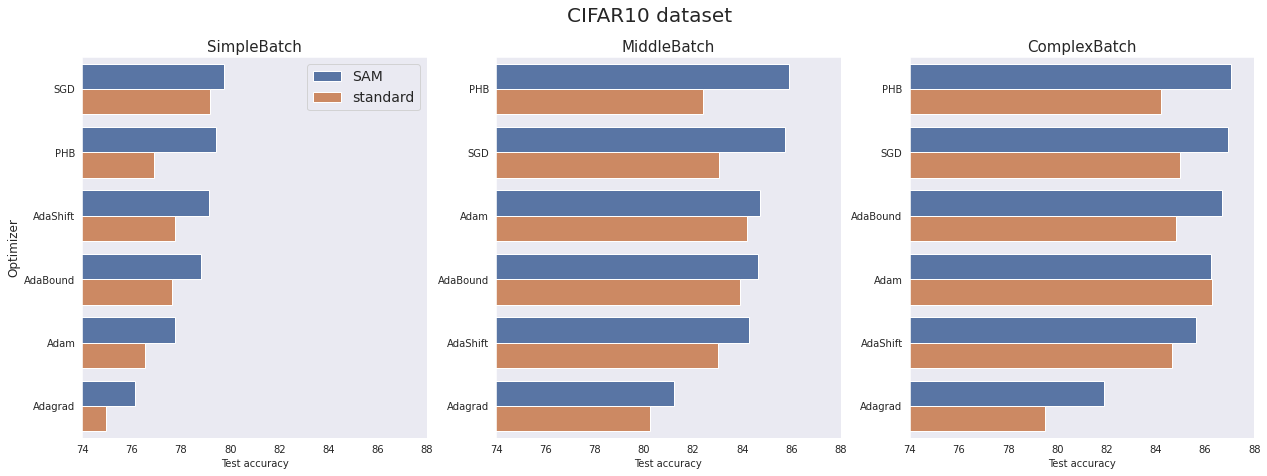

In [ ]:
########## Plot that is included in the paper
fig, ax = plt.subplots(1,3, figsize=(21, 7), sharex=True)
fig.suptitle(f'CIFAR10 dataset', fontsize=20)

for i,arc in enumerate(['SimpleBatch', 'MiddleBatch', 'ComplexBatch']):
    df = cifar_df[(cifar_df['Architecture']==arc)&(cifar_df['epoch']=='converged')]
    orient = 'h'
    
    sns.barplot(data=df.sort_values('Validation accuracy', ascending=False), 
                y='Optimizer', hue='Minimization', x='Validation accuracy',
                ax=ax[i], 
                palette="deep", orient=orient)
    
    ax[i].set_title(arc, fontsize=15)
    if i != 0:
      ax[i].set(ylabel=None)
      ax[i].get_legend().remove()
    ax[i].set_xlabel('Test accuracy')

ax[0].set_ylabel('Optimizer', fontsize=12)
ax[0].set_xlim(74, 88)
ax[0].legend(fontsize=14)

if plot_folder != None:
    plt.savefig(f'{plot_folder}CIFAR10_val_acc.png', dpi=300)
plt.show()

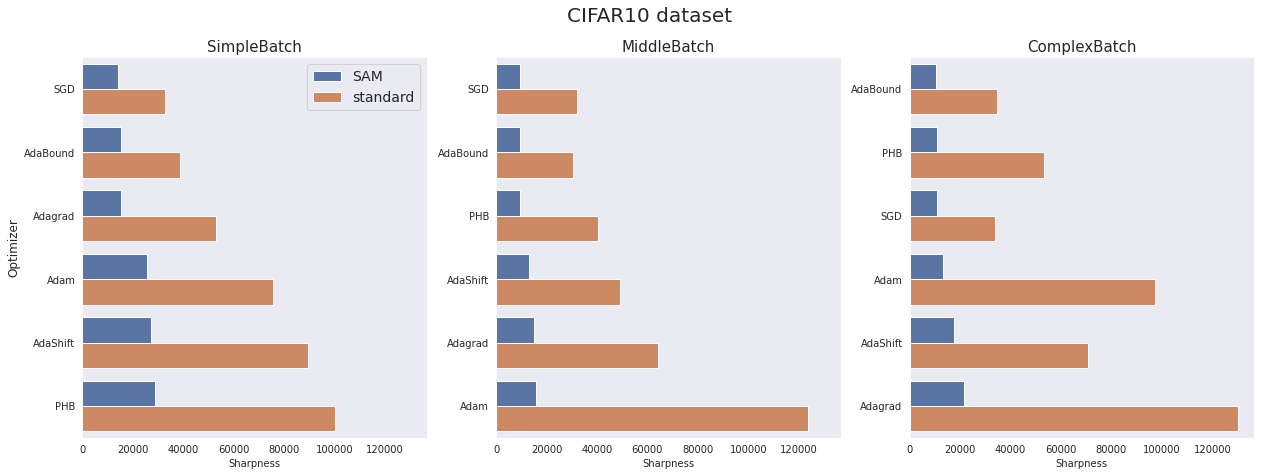

In [ ]:
########## Plot that is included in the paper
fig, ax = plt.subplots(1,3, figsize=(21, 7), sharex=True)
fig.suptitle(f'CIFAR10 dataset', fontsize=20)

for i,arc in enumerate(['SimpleBatch', 'MiddleBatch', 'ComplexBatch']):
    df = cifar_df[(cifar_df['Architecture']==arc)&(cifar_df['epoch']=='converged')]
    orient = 'h'
    
    sns.barplot(data=df.sort_values('Sharpness'), 
                y='Optimizer', hue='Minimization', x='Sharpness',
                ax=ax[i], 
                palette="deep", orient=orient)
    
    ax[i].set_title(arc, fontsize=15)
    if i != 0:
      ax[i].set(ylabel=None)
      ax[i].get_legend().remove()

ax[0].legend(fontsize=14)
ax[0].set_ylabel('Optimizer', fontsize=12)

if plot_folder != None:
    plt.savefig(f'{plot_folder}CIFAR10_sharpness_same_scale.png', dpi=300)
plt.show()

## Corelation between minimum sharpness and generalization gap

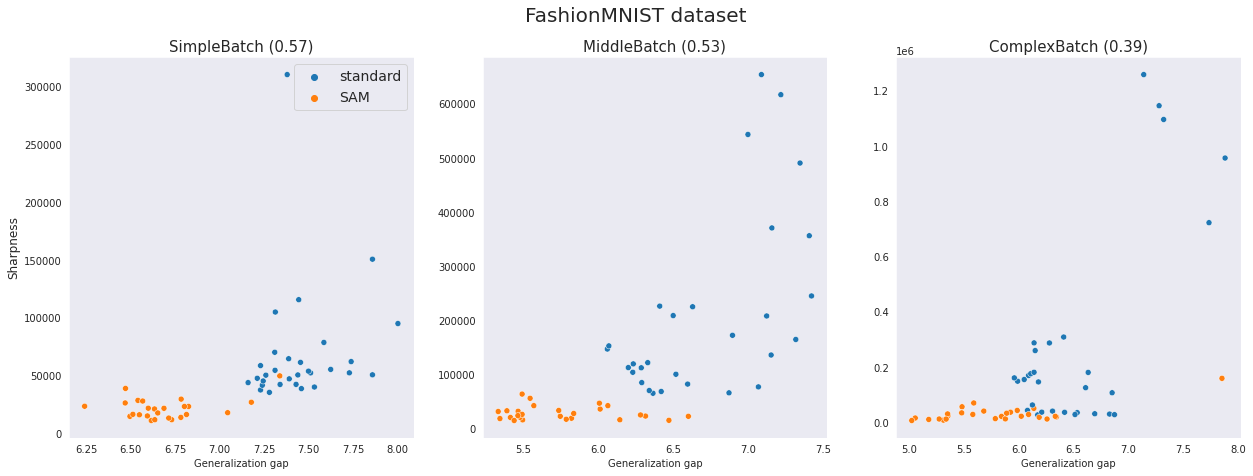

In [ ]:
########## Plot not included in the paper - measures correlation for each architecture for FashionMNIST
fig, ax = plt.subplots(1,3, figsize=(21, 7))
fig.suptitle(f'FashionMNIST dataset', fontsize=20)

for i,arc in enumerate(['SimpleBatch', 'MiddleBatch', 'ComplexBatch']): 
    sns.scatterplot(data=fmnist_df[fmnist_df.Architecture == arc], x='Generalization gap', y='Sharpness', hue='Minimization', ax=ax[i])
    if i != 0:
        ax[i].set_ylabel('')
        ax[i].get_legend().remove()

    x = fmnist_df[fmnist_df.Architecture == arc].dropna()['Generalization gap']
    y = fmnist_df[fmnist_df.Architecture == arc].dropna()['Sharpness']
    k = scipy.stats.kendalltau(x, y)
    ax[i].set_title(f'{arc} ({k[0]:.2f})', fontsize=15)

ax[0].set_ylabel('Sharpness', fontsize=12)
ax[0].legend(fontsize=14)

plt.savefig(f'{plot_folder}correlation_fmnist.png', dpi=300)

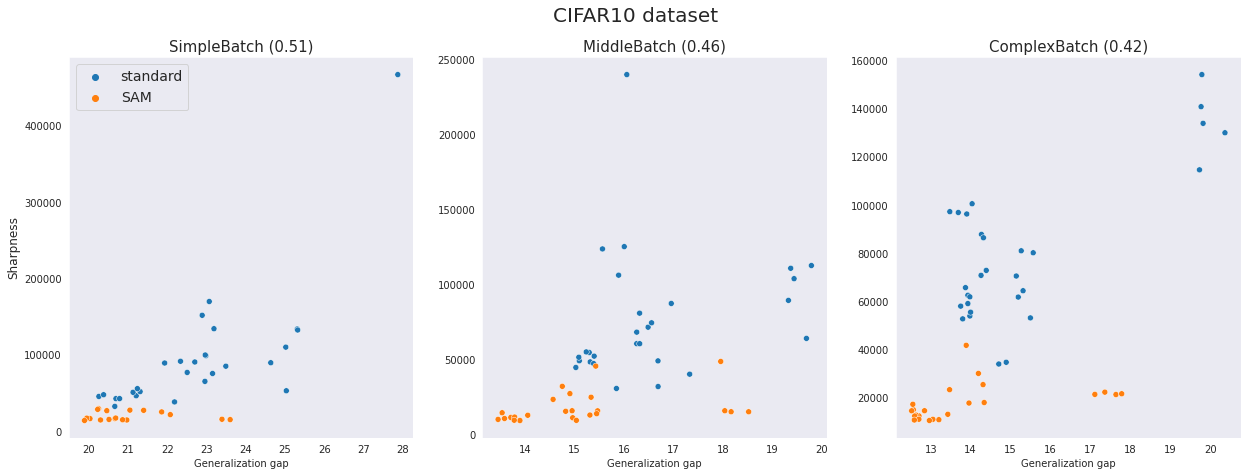

In [ ]:
########## Plot that is not included in the paper - measures correlation for each architecture for CIFAR10
fig, ax = plt.subplots(1,3, figsize=(21, 7))
fig.suptitle(f'CIFAR10 dataset', fontsize=20)

for i,arc in enumerate(['SimpleBatch', 'MiddleBatch', 'ComplexBatch']): 
    sns.scatterplot(data=cifar_df[cifar_df.Architecture == arc], x='Generalization gap', y='Sharpness', hue='Minimization', ax=ax[i])
    if i != 0:
        ax[i].set_ylabel('')
        ax[i].get_legend().remove()

    x = cifar_df[cifar_df.Architecture == arc].dropna()['Generalization gap']
    y = cifar_df[cifar_df.Architecture == arc].dropna()['Sharpness']
    k = scipy.stats.kendalltau(x, y)
    ax[i].set_title(f'{arc} ({k[0]:.2f})', fontsize=15)

ax[0].set_ylabel('Sharpness', fontsize=12)
ax[0].legend(fontsize=14)

if plot_folder != None:
    plt.savefig(f'{plot_folder}correlation_cifar.png', dpi=300)

p-value 1.675882899619825e-05
p-value 0.011293415200324022


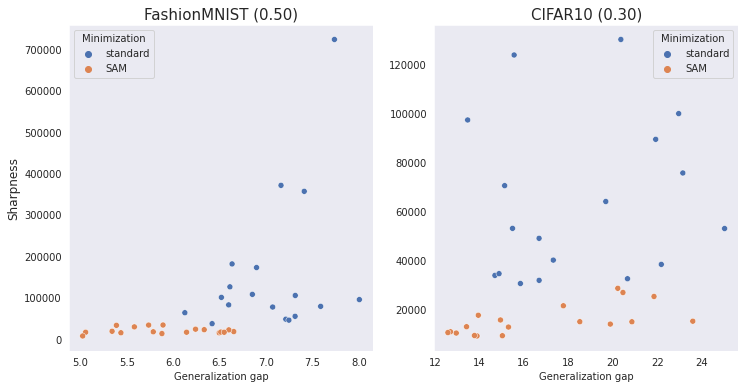

In [ ]:
### Plot in the paper 
fig, ax = plt.subplots(1,2, figsize=(12, 6))

sns.scatterplot(data=fmnist_df[fmnist_df.epoch=='converged'], x='Generalization gap', y='Sharpness', hue='Minimization', ax=ax[0], palette='deep')
x = fmnist_df[fmnist_df.epoch=='converged'].dropna()['Generalization gap']
y = fmnist_df[fmnist_df.epoch=='converged'].dropna()['Sharpness']
k = scipy.stats.kendalltau(x, y)
ax[0].set_title(f'FashionMNIST ({k[0]:.2f})', fontsize=15)
ax[0].set_ylabel('Sharpness', fontsize=12)
print(f'p-value {k[1]}')

sns.scatterplot(data=cifar_df[cifar_df.epoch =='converged'], x='Generalization gap', y='Sharpness', hue='Minimization', ax=ax[1], palette='deep')
x = cifar_df[cifar_df.epoch =='converged'].dropna()['Generalization gap']
y = cifar_df[cifar_df.epoch =='converged'].dropna()['Sharpness']
k = scipy.stats.kendalltau(x, y)
ax[1].set_title(f'CIFAR10 ({k[0]:.2f})', fontsize=15)
ax[1].set(ylabel=None)
print(f'p-value {k[1]}')

if plot_folder != None:
    plt.savefig(f'{plot_folder}correlation_final.png', dpi=300)

## Choice of optimize - adaptive vs. non-adaptive

In [ ]:
# Adding indicator if optimizor is adaptive or not
is_adaptive = lambda x : 'adaptive' if x.lower().startswith('ada') else 'non-adaptive'

fmnist_df['adaptive'] = fmnist_df['optim'].apply(is_adaptive)
fmnist_df['adaptive'].describe()

count          169
unique           2
top       adaptive
freq           112
Name: adaptive, dtype: object

In [ ]:
# Reporting average validation accuracy and sharpness

fmnist_df_no_sam = fmnist_df[fmnist_df['Minimization']=='standard'].dropna()
fmnist_df_no_sam['dataset'] = 'FashionMNIST'
fmnist_df_no_sam.groupby('Optimizer').mean().sort_values('Validation accuracy', ascending = False)[['Validation accuracy', 'Sharpness']]

,Validation accuracy,Sharpness
Optimizer,,
SGD,93.355997,90347.966340
AdaBound,93.344665,111408.603229
Adam,93.040663,59814.534787
PHB,92.969331,185464.466488
AdaShift,92.742855,95656.100080
Adagrad,92.602665,561759.559346


In [ ]:
cifar_df_no_sam = cifar_df[cifar_df['Minimization']=='standard']
cifar_df_no_sam['dataset'] = 'CIFAR10' 
cifar_df_no_sam.groupby('Optimizer').mean().sort_values('Validation accuracy', ascending = False)[['Validation accuracy', 'Sharpness']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Validation accuracy,Sharpness
Optimizer,,
SGD,83.200665,48122.125176
AdaBound,83.031331,49213.654733
Adam,82.558998,99841.557479
PHB,81.937999,97502.878728
AdaShift,81.262665,103066.032418
Adagrad,78.486664,111665.522629


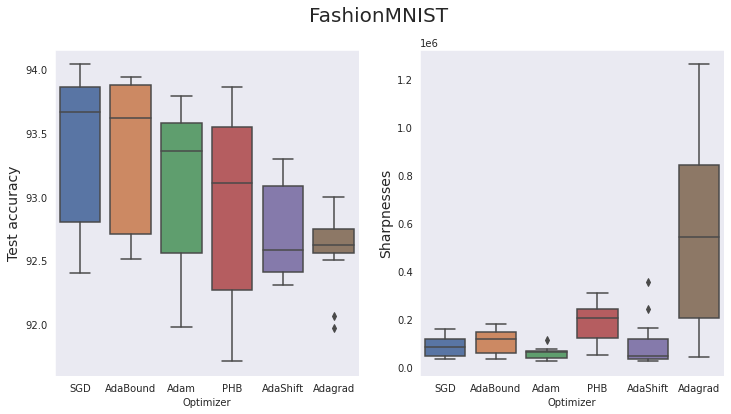

In [ ]:
# Plotting distribution of validation accuracies and sharpnesses in the case of FashionMNIST
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('FashionMNIST', fontsize=20)

order = ['SGD', 'AdaBound', 'Adam', 'PHB', 'AdaShift', 'Adagrad']
sns.boxplot(data=fmnist_df_no_sam, x='Optimizer', y='Validation accuracy', ax=ax[0], order=order, palette='deep')
ax[0].set_ylabel('Test accuracy', fontsize=14)
sns.boxplot(data=fmnist_df_no_sam, x='Optimizer', y='Sharpness', ax=ax[1], order=order, palette='deep')
ax[1].set_ylabel('Sharpnesses', fontsize=14)

if plot_folder != None:
    plt.savefig(f'{plot_folder}non_sam_fmnist.png')

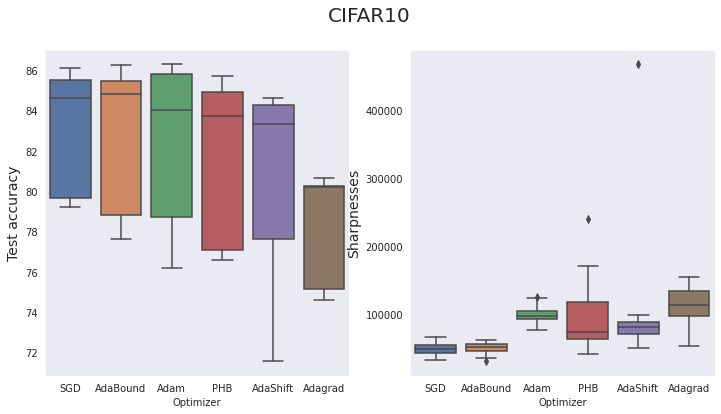

In [ ]:
# Plotting distribution of validation accuracies and sharpnesses in the case of CIFAR10
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.suptitle('CIFAR10', fontsize=20)

sns.boxplot(data=cifar_df_no_sam, x='Optimizer', y='Validation accuracy', ax=ax[0], order=order, palette='deep')
ax[0].set_ylabel('Test accuracy', fontsize=14)
sns.boxplot(data=cifar_df_no_sam, x='Optimizer', y='Sharpness', ax=ax[1], order=order, palette='deep')
ax[1].set_ylabel('Sharpnesses', fontsize=14)

if plot_folder != None:
    plt.savefig(f'{plot_folder}non_sam_cifar.png')

In [ ]:
# Concatenation of dataframes corresponding to different datasets
big_df_no_sam = pd.concat((fmnist_df_no_sam,cifar_df_no_sam), axis=0)
big_df_no_sam

,Minimization,optim,Optimizer,training_accuracy,Validation accuracy,training_loss,val_loss,Generalization gap,epoch,Sharpness,Architecture,adaptive,dataset
0,standard,Adam,Adam,99.513336,91.979996,0.014862,0.729570,7.533340,50.0,40364.594347,SimpleBatch,adaptive,FashionMNIST
1,standard,SGD 0.1,SGD,100.000000,92.769997,0.000050,0.516581,7.230003,50.0,37819.346180,SimpleBatch,non-adaptive,FashionMNIST
2,standard,AdaBound,AdaBound,100.000000,92.720001,0.000055,0.537387,7.279999,50.0,35747.061795,SimpleBatch,adaptive,FashionMNIST
3,standard,AdaShift,AdaShift,99.781670,92.389999,0.005874,0.600980,7.391670,50.0,47427.310191,SimpleBatch,adaptive,FashionMNIST
4,standard,Adagrad,Adagrad,100.000000,92.659996,0.000585,0.440312,7.340004,50.0,42589.065929,SimpleBatch,adaptive,FashionMNIST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,standard,Adam,Adam,99.767998,86.290001,0.008549,1.441957,13.477997,converged,97314.887747,ComplexBatch,adaptive,CIFAR10
43,standard,Adagrad,Adagrad,99.888000,79.519997,0.009620,0.959188,20.368004,converged,130116.135802,ComplexBatch,adaptive,CIFAR10
47,standard,AdaBound,AdaBound,99.709999,84.820000,0.009147,0.913536,14.889999,converged,34710.009932,ComplexBatch,adaptive,CIFAR10
48,standard,AdaShift 0.01,AdaShift,99.792000,84.650002,0.005884,1.056762,15.141998,converged,70562.848900,ComplexBatch,adaptive,CIFAR10


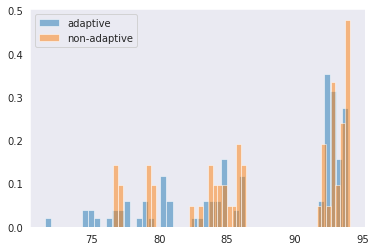

In [ ]:
plt.hist(big_df_no_sam[(big_df_no_sam['adaptive']=='adaptive') ]['Validation accuracy'], alpha=0.5, density=True, label='adaptive', bins=50)
plt.hist(big_df_no_sam[(big_df_no_sam['adaptive']=='non-adaptive') ]['Validation accuracy'], alpha=0.5, density=True, label='non-adaptive', bins=50)
plt.legend()

In [ ]:
# Testing if validation accuracies in the case of adaptive and non-adaptive algorithms are drawn from the same distribution
# Since p-value is high - this hypothesis can not be rejected
x = big_df_no_sam[(big_df_no_sam['adaptive']=='adaptive') ]['Validation accuracy'].values
y =  big_df_no_sam[(big_df_no_sam['adaptive']=='non-adaptive') ]['Validation accuracy'].values
scipy.stats.ks_2samp(x,y)

Ks_2sampResult(statistic=0.12894736842105264, pvalue=0.48342957087214533)

In [ ]:
# Testing if sharpnesses in the case of adaptive and non-adaptive algorithms are drawn from the same distribution
# Since p-value is high - this hypothesis can not be rejected
x = big_df_no_sam[(big_df_no_sam['adaptive']=='adaptive') ]['Sharpness'].values
y =  big_df_no_sam[(big_df_no_sam['adaptive']=='non-adaptive') ]['Sharpness'].values
scipy.stats.ks_2samp(x,y)

Ks_2sampResult(statistic=0.11403508771929824, pvalue=0.636766610230814)